<a href="https://colab.research.google.com/github/dusrbrla-mbb/kubig-portfolio/blob/temp/ml_exe_sensor_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Understanding - PHM
##### 장비가 언제 고장날지 미리 알아보기
* unit - 엔진 번호 -> 모든 unit은 새 엔진으로 시작한 것이 아닙니다.
* cycle - 몇 번째 사용한 것인가 -> 2 는 1 대비 한 번 더 사용하였음
* op_no_1~3 -> 동작 모드이고, 현재 사용하지 않을 컬럼입니다.
* T2 - 엔진으로 들어가는 공기 온도
* T24 - LPC 밖으로 나가는 공기 온도
* T30 - HPC 밖으로 나가는 공기 온도
* T50 - LPT 밖으로 나가는 공기 온도
* P2 - 엔진으로 들어가는 공기 압력
* P15 - bypass-duct 라는 곳의 공기 압력
* P30 - HPC 밖으로 나가는 공기 압력
* Ps30 - HPC 밖으로 나가는 공기 압력(P30과 유사)
* Nf - fan(날개)의 회전 속도 -> 이론
* NRf - fan(날개)의 회전 속도 -> 실제
* Nf_dmd - 실제 필요한 fan(날개)의 회전 속도 -> 이론
* PCNfR_dmd - 실제 필요한 fan(날개)의 회전 속도 -> 실제
* Nc - core(엔진 내부)의 회전 속도 -> 이론
* NRc - core(엔진 내부)의 회전 속도 -> 실제
* epr - 엔진 내부 공기압 비율
* Phi - HPC 로 유입되는 연료의 비율
* BPR - 전체 공기 양 대비 bypass-duct 로 빠지는 공기의 비율
* htBleed - Bleed Enthalpy 라는 수치
* W31 - HPT 부품으로 들어가는 냉각수의 손실률
* W32 - LPT 부품으로 들어가는 냉각수의 손실률

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Study/Jupyter'
df = pd.read_csv(path + '/' + 'FD001_01.csv')
print(df.shape)
df.head().T

Mounted at /content/drive
(20631, 26)


,0,1,2,3,4
unit,1.0000,1.0000,1.0000,1.0000,1.0000
cycle,1.0000,2.0000,3.0000,4.0000,5.0000
op_1,-0.0007,0.0019,-0.0043,0.0007,-0.0019
op_2,-0.0004,-0.0003,0.0003,0.0000,-0.0002
op_3,100.0000,100.0000,100.0000,100.0000,100.0000
T2,518.6700,518.6700,518.6700,518.6700,518.6700
T24,641.8200,642.1500,642.3500,642.3500,642.3700
T30,1589.7000,1591.8200,1587.9900,1582.7900,1582.8500
T50,1400.6000,1403.1400,1404.2000,1401.8700,1406.2200
P2,14.6200,14.6200,14.6200,14.6200,14.6200


##### Categorical Column 없음, 빈 값 없음

In [2]:
df.info() # 판다스 프로파일링보다 적은 정보지만, 간편하게 데이터 이해.
# 정석대로 하려면, 각 컬럼마다 통계량을 모두 도출해야 하지만 보고서가 길어지므로 skip.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit       20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   op_1       20631 non-null  float64
 3   op_2       20631 non-null  float64
 4   op_3       20631 non-null  float64
 5   T2         20631 non-null  float64
 6   T24        20631 non-null  float64
 7   T30        20631 non-null  float64
 8   T50        20631 non-null  float64
 9   P2         20631 non-null  float64
 10  P15        20631 non-null  float64
 11  P30        20631 non-null  float64
 12  Nf         20631 non-null  float64
 13  Nc         20631 non-null  float64
 14  epr        20631 non-null  float64
 15  Ps30       20631 non-null  float64
 16  phi        20631 non-null  float64
 17  NRf        20631 non-null  float64
 18  NRc        20631 non-null  float64
 19  BPR        20631 non-null  float64
 20  farB  

##### 100개의 서로 다른 엔진 데이터로 구성되어 있음.

In [3]:
import numpy as np
np.unique(df['unit'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

### 데이터 탐색
##### 한 unit(엔진) 을 정해서 사용량에 따라 센서 값 변화 확인
##### 한 센서를 정해서 사용량에 따라 unit 별 센서값 변화 확인
* 같은 unit 일 때, 센서의 종류에 따라 고장에 가까울수록 변화가 다름.
* 다른 unit 일 때, 같은 센서라면 고장에 가까울수록 변화의 방향이 같음.

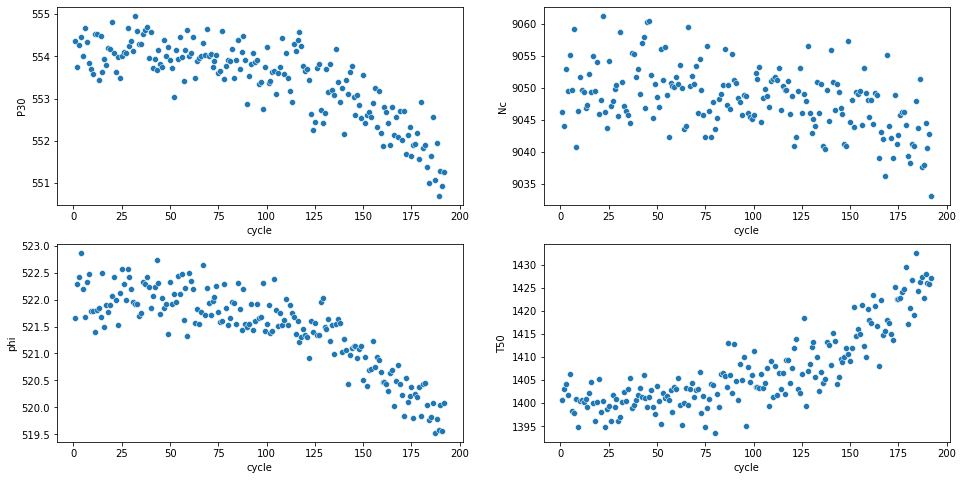

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 8)
tgt_df = df.loc[df['unit'] == 1]
sns.scatterplot(data=tgt_df, x='cycle', y='P30', ax=ax1)
sns.scatterplot(data=tgt_df, x='cycle', y='Nc', ax=ax2)
sns.scatterplot(data=tgt_df, x='cycle', y='phi', ax=ax3)
sns.scatterplot(data=tgt_df, x='cycle', y='T50', ax=ax4)

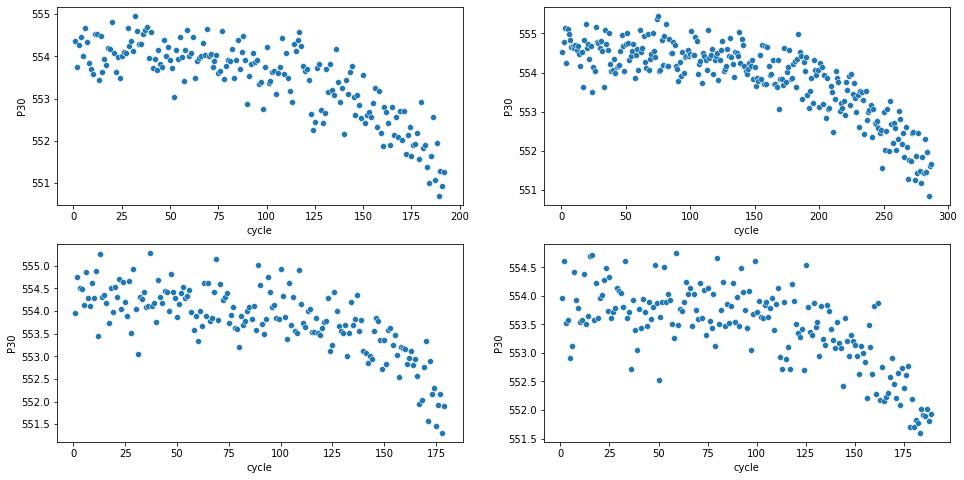

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 8)
sns.scatterplot(data=df.loc[df['unit'] == 1], x='cycle', y='P30', ax=ax1)
sns.scatterplot(data=df.loc[df['unit'] == 2], x='cycle', y='P30', ax=ax2)
sns.scatterplot(data=df.loc[df['unit'] == 3], x='cycle', y='P30', ax=ax3)
sns.scatterplot(data=df.loc[df['unit'] == 4], x='cycle', y='P30', ax=ax4)

##### 목표는 잔존수명인데, 현 컬럼에는 잔존수명이 없음.
* cycle 컬럼의 경우, 서로 다른 unit에서 같은 값(cycle)을 가질 때, 잔존수명이 동일함을 의미하지 않음.  
\-> 방향성에 맞는 label 을 'RUL' 로 만들어 줌.
* 잔존수명의 특성 : 잔존수명이 0에 가까울 때와 멀 때의 차이가 발생함.  
\-> 이 성질을 반영하기 위해, 잔존수명에 로그 변환 수행.

In [6]:
import warnings
warnings.filterwarnings(action='ignore')  # 오류가 아니므로 경고 문구 삭제
rul_df = pd.DataFrame()
for i in range(100):
    one_unit = df.loc[df['unit'] == i + 1]
    cy_max = one_unit['cycle'].max()
    one_unit['RUL_log'] = np.log(cy_max - one_unit['cycle'] + 1)
    rul_df = pd.concat([rul_df, one_unit])
print(df.shape)
print(rul_df.shape)

(20631, 26)
(20631, 27)


### 데이터 준비 단계 수행
##### feature selection, train / test split
* filter 방식으로 feature selection 수행.

In [7]:
desc_t = rul_df.describe().T
desc_t.loc[desc_t['std'] >= 0.01].T.columns

Index(['unit', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi',
       'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL_log'],
      dtype='object')

In [8]:
features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi',
       'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']
label = 'RUL_log'
train, test = rul_df[0::2].reset_index(), rul_df[1::2].reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

### 모델 기획 및 수립
##### 후보군 : RandomForest, XGBoost, LightGBM, CatBoost
* Categorical Column 이 없으므로 CatBoost 제외
* 실시간 서비스가 아니기 때문에, 속도가 필요한 것이 아니므로 LightGBM 제외
* 정해진 시간 이내에서 RandomForest, XGBoost 중 정확도 높은 것 선택.
* 정답이어서가 아니라, 여러 고민(논리, 증거)에 의해 내린 결정.

In [9]:
from sklearn.ensemble import RandomForestRegressor as rf
from xgboost import XGBRegressor as xg
m1, m2 = rf(n_jobs=-1), xg()
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
print(m1.score(X_test, y_test))
print(m2.score(X_test, y_test))
# 하이퍼파라미터 튜닝을 하지 않은 상태
# 주어진 시간이 더 많았다면, 선택이 바뀔 것.

[10:09:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8496039171470008
0.8523549922010157


##### 정해진 시간 내 정확도 비교 결과, RandomForest 선정.

### XAI 이용하여 모형 해석

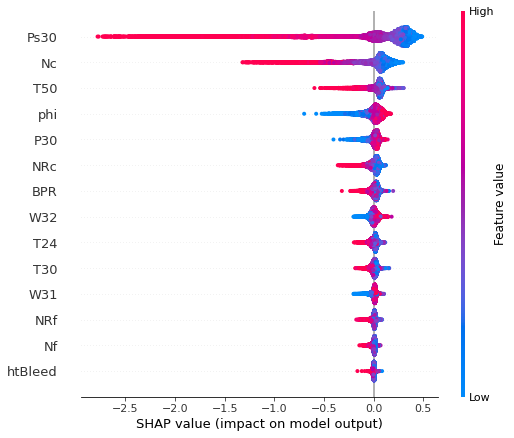

In [ ]:
model = m1
import shap
shap.initjs()
X = rul_df[features]
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X)

##### 전체 변수 해석
* Ps30 : HPC 밖으로 나가는 공기 압력이 높을수록 예상 잔존수명 감소.

* P30 : HPC 밖으로 나가는 공기 압력이 낮을수록 예상 잔존수명 감소.

 

* Nc : core(엔진 내부)의 회전 속도가 빠를수록 예상 잔존수명 감소.

* NRc : core(엔진 내부)의 회전 속도가 빠를수록 예상 잔존수명 감소.

 

* T50 : LPT 밖으로 나가는 공기 온도가 높을수록 예상 잔존수명 감소.

* T24 : LPC 밖으로 나가는 공기 온도가 높을수록 예상 잔존수명 감소.

* T30 : HPC 밖으로 나가는 공기 온도가 높을수록 예상 잔존수명 감소.

 

* W31 : HPT 부품으로 들어가는 냉각수의 손실률이 작을수록 예상 잔존수명 감소.

* W32 : LPT 부품으로 들어가는 냉각수의 손실률이 작을수록 예상 잔존수명 감소.

 

* BPR : 전체 공기 양 대비 bypass-duct 로 빠지는 공기의 비율이 클수록 예상 잔존수명 감소.

 

* phi : HPC 로 유입되는 연료의 비율이 작을수록 예상 잔존수명 감소.

##### PDP 상, 각 센서마다 계단식으로 잔존수명 증감에 영향을 주는 것들 존재
* 해당 하락이 발생하는 지점을 찾아서, 이후 모니터링 가능성 타진.

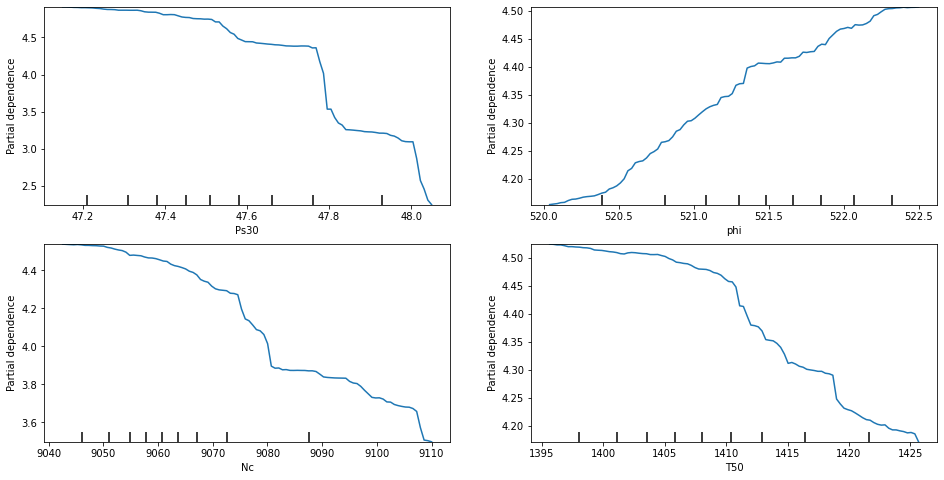

In [10]:
from sklearn.inspection import plot_partial_dependence as pdp
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 8)
model = rf()
model.fit(X_train, y_train)
pdp(model, rul_df[features], ['Ps30'], ax=ax1)
pdp(model, rul_df[features], ['phi'], ax=ax2)
pdp(model, rul_df[features], ['Nc'], ax=ax3)
pdp(model, rul_df[features], ['T50'], ax=ax4)

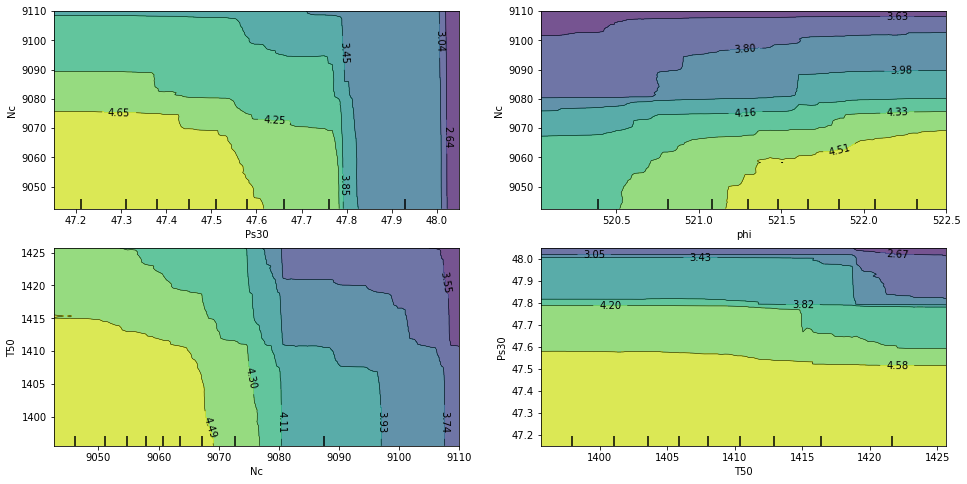

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 8)
pdp(model, rul_df[features], [('Ps30', 'Nc')], ax=ax1)
pdp(model, rul_df[features], [('phi', 'Nc')], ax=ax2)
pdp(model, rul_df[features], [('Nc', 'T50')], ax=ax3)
pdp(model, rul_df[features], [('T50', 'Ps30')], ax=ax4)